In [1]:
# Names: Alisha Rawal, Jae Garcia-Herrera, Cole Harper, Vincent Cacciatore

# Final Project: 2016 Voter Survey Data

In this data set we will be examining survey data from the 2016 presidential election to correlations between voter concerns and voter behaviors. We will be examining how priorities of voters inform who they will voter for during an election.

In [17]:
import warnings
import pandas as pd
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder


# Importing Data and About the Data Set
Here we import the data set from the csv file.
Our dataset comes from a survey conducted by the non-paritsan Democracy Fund Voter Survey Group. The survey was conducted after the 2016 presidential election with the intent to  better understand voter interests and voting behavior across the United States. 
What follows is a data set with 668 features - each relaying different information about the voters surveyed including candidates voted for, demographic data, and public issue interest.
We slim down this data both in features and number of data points down below so that it becomes more fit for machine learning models and focuses on the questions we want to answer with this data set.

The main question we want to ask is: *Can we predict the presidential candidate a voter voted for based on their political interest in public issues?* Our **Feature Selection** and **Data Cleaning** sections below explain how we extracted this data from the data set. Meanwhile, our **Data Exploration** section provides statistical justification that there is indeed a correlation between public issue interests and presidential candidate that is worth exploring. 

In [15]:
data = pd.read_csv("voter_survey_2016_data.csv", engine='python')
data.head(10)
warnings.filterwarnings('ignore')



# Feature Selection
We want to examine which issues matter to which party's voters. To examine this we will be looking at columns
imiss_a_2016 - imiss_y_2016. These columns represent the surveyer's answers to questions where they were asked to rank how important a public issue was on a categorical scale: "Very important", "Somewhat important, "Not very important", "unimportant". We will focus our data set on these columns so that our machine learning algorithm focuses purely on voter interest since that is what we're interested in investigating. We will also be including the column of who the surveyer voted for president as this will form the basis of our labels (presvote16post_2016). 

In [3]:
def features(data, chosen_features):
    columns_renamed = ['Crime', 'The Economy', 'Immigration', 'The Enviroment', 'Religious Liberty', 'Terrorism', 'Gay Rights', 'Education', 'Family and Medical Leave', 'Healthcare', 'Money in Politics', 'Climate Change', 'Social Security', 'Infrastructure Investment', 'Jobs', 'The Budget Deficit', 'Poverty', 'Taxes', 'Medicare', 'Abortion', 'Size of Goverment', 'Race Equality', 'Gender Equality', 'immi_contribution_2016', 'immi_naturalize_2016', 'immi_makedifficult_2016', 'immi_muslim_2016', 'abortview3_2016', 'gaymar_2016', 'view_transgender_2016', 'deathpen_2016', 'deathpenfreq_2016', 'police_threat_2016', 'univhealthcov_2016', 'healthreformbill_2016', 'envwarm_2016', 'envpoll2_2016', 'affirmact_gen_2016', 'taxdoug_2016', 'govt_reg_2016', 'gvmt_involment_2016', 'tradepolicy_2016', 'free_trade_1_2016', 'free_trade_2_2016', 'free_trade_3_2016', 'free_trade_4_2016']
    return dataPrep(data, chosen_features, columns_renamed)
    

# Data Cleaning

We want to turn the data into something that we can easily use to train our models. We change our labels to: Hillary Clinton to 1, Donald Trump to 2, and all others are 0. We also transform the 23 question survey using One Hot Encoding because all of the responces are catigorical. We have also added results of questions about issues to the data set. The
overall size of the dataset is about 8000 x 46, which will expand to 8000 x 173 with one hot encoding. We also dropped NaN values from the dataset. This decreased the number of datapoints to 5716. While a significant number of data points were lost, we still have a large number to use for our machin learning models so we believe this smaller sample size will not affect the results a significant amount. 


In [4]:

def dataPrep(data, columns, columns_renamed):
    
    df = pd.DataFrame(data=data, columns=columns)
    
    df.dropna(axis=0, inplace=True) #This drops all nans 
    labels = df['presvote16post_2016']
    df = df.drop(['presvote16post_2016'], axis=1)
    #df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0])) #this fills with mode of column
    columns = ['Crime', 'The Economy', 'Immigration', 'The Enviroment', 'Religious Liberty', 'Terrorism', 'Gay Rights', 'Education', 'Family and Medical Leave', 'Healthcare', 'Money in Politics', 'Climate Change', 'Social Security', 'Infrastructure Investment', 'Jobs', 'The Budget Deficit', 'Poverty', 'Taxes', 'Medicare', 'Abortion', 'Size of Goverment', 'Race Equality', 'Gender Equality', 'immi_contribution_2016', 'immi_naturalize_2016', 'immi_makedifficult_2016', 'immi_muslim_2016', 'abortview3_2016', 'gaymar_2016', 'view_transgender_2016', 'deathpen_2016', 'deathpenfreq_2016', 'police_threat_2016', 'univhealthcov_2016', 'healthreformbill_2016', 'envwarm_2016', 'envpoll2_2016', 'affirmact_gen_2016', 'taxdoug_2016', 'govt_reg_2016', 'gvmt_involment_2016', 'tradepolicy_2016', 'free_trade_1_2016', 'free_trade_2_2016', 'free_trade_3_2016', 'free_trade_4_2016']
    df.columns = columns
    data_x = pd.get_dummies(df)
    label = transformLabels(labels)
    return label, data_x

def transformLabels(temp):
    label = []
    for name in temp:
        if name == "Hillary Clinton":
            label.append(1)
        elif name == "Donald Trump":
            label.append(2)
        elif name == "Gary Johnson":
            label.append(3)
        elif name == "Jill Stein":
            label.append(4)
        elif name == "Evan McMullin":
            label.append(5)
        else:
            label.append(0)
    return label

chosen_features = ['presvote16post_2016', 'imiss_a_2016', 'imiss_b_2016', 'imiss_c_2016', 'imiss_d_2016', 'imiss_e_2016', 'imiss_f_2016', 'imiss_g_2016', 'imiss_h_2016', 'imiss_i_2016', 'imiss_j_2016', 'imiss_k_2016', 'imiss_l_2016', 'imiss_m_2016', 'imiss_n_2016', 'imiss_o_2016','imiss_p_2016', 'imiss_q_2016','imiss_r_2016','imiss_s_2016', 'imiss_t_2016','imiss_u_2016','imiss_x_2016','imiss_y_2016', 'immi_contribution_2016', 'immi_naturalize_2016', 'immi_makedifficult_2016', 'immi_muslim_2016', 'abortview3_2016', 'gaymar_2016', 'view_transgender_2016', 'deathpen_2016', 'deathpenfreq_2016', 'police_threat_2016', 'univhealthcov_2016', 'healthreformbill_2016', 'envwarm_2016', 'envpoll2_2016', 'affirmact_gen_2016', 'taxdoug_2016', 'govt_reg_2016', 'gvmt_involment_2016', 'tradepolicy_2016', 'free_trade_1_2016', 'free_trade_2_2016', 'free_trade_3_2016', 'free_trade_4_2016']
label, data_x = features(data, chosen_features)
    




# Data Exploration
With an original data set with so many features, we decided it was best to focus on a subset of those features so we can hone in on a specific question about voter behavior. We decided to focus on public issue interest since this can help political candidates determine how to develop a platform during their campaigns if they are trying to appeal to a certain group of voters. We decided to avoid demographic information to keep our models focused on public interest and avoid profiling voters based on race, gender, and sexuality in our machine learning models since little information about what voters actually want in their politicans can be gained from that information.

Before we go ahead with our machine learning models we should explore the data and see if the data concerning voter interest is appropriate for classifier data. We need to see if there is a correlation between voter interest and political candidate voted for. To do this, we provided a visual analysis of voter behavior using bar graphs and a chi squared test to see if a correlation exists. 

## Bar Graph Representations
Below we can visually analyze this data through bar graphs. We have sorted the responses by label (presidential candidate voted for) and response to the first few questions of the survey where issues were ranked on the categorical scale: 'Very important', 'Somewhat important', 'Not very important', 'Unimportant'.

Issues that are split across party lines can be seen visually via large gaps in the blue bar (Democrat voters) and red bars (Republican voters) in importance and whether the blue and red bars increase or decrease in size when moving along the x axis. For instance, social issues such as Gender Equality, Racial Equality, and Gay Rights have a large blue bar in the Very Important category, while the red bars are larger in the Not Very Important or Unimportant categories. Meanwhile issues of national security such as terrorism, immigration, and size of government have large red bars in the Very Important category while the blue bars are more evenly spaced out. 

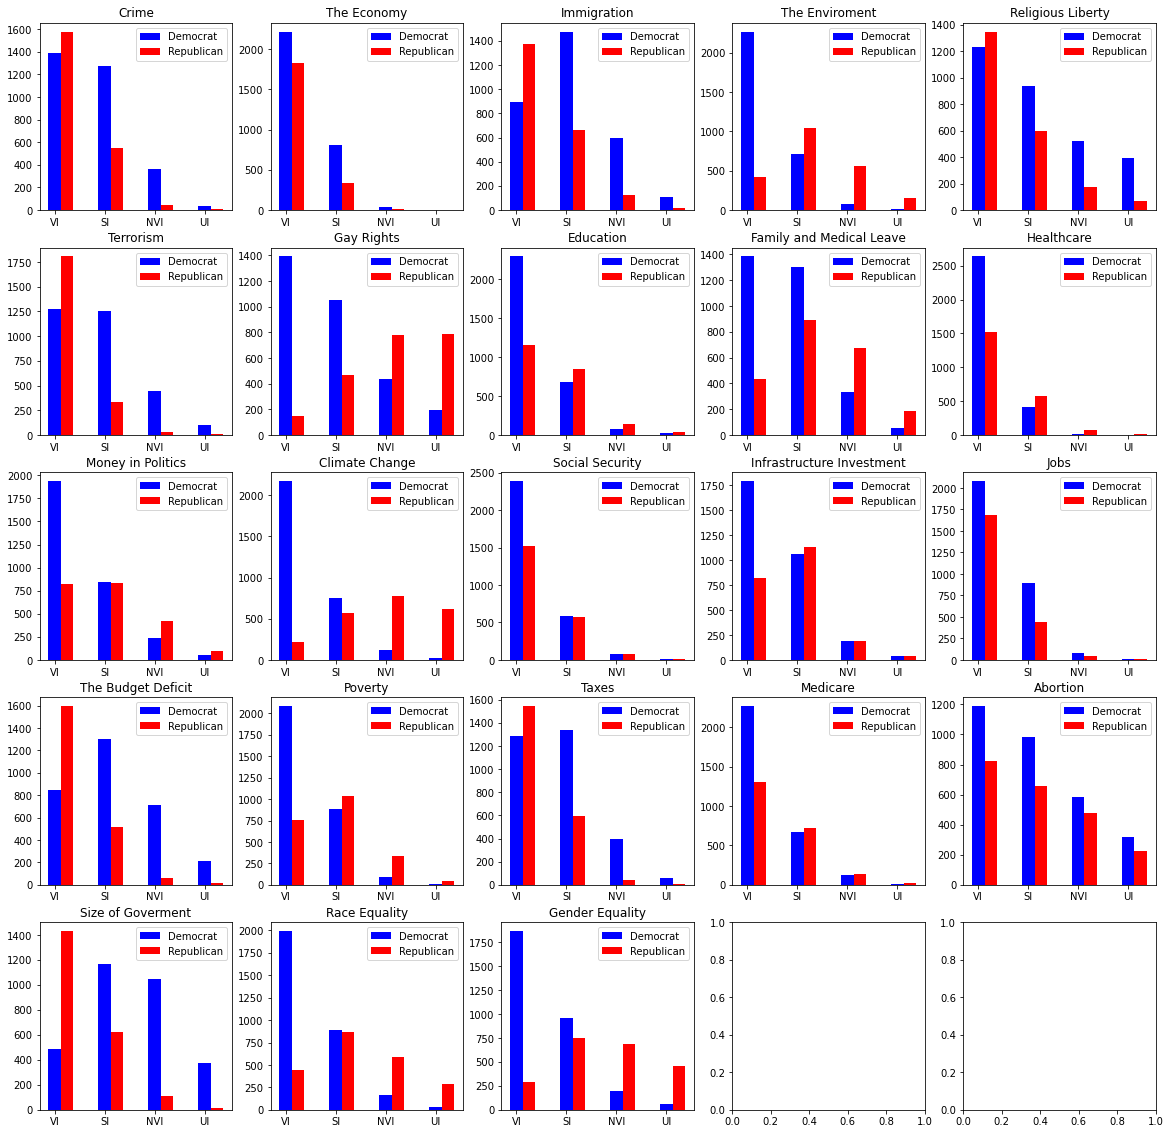

In [6]:
def dataRelabeled(data):
    
    columns = ['presvote16post_2016', 'imiss_a_2016', 'imiss_b_2016', 'imiss_c_2016', 'imiss_d_2016', 'imiss_e_2016', 'imiss_f_2016', 'imiss_g_2016', 'imiss_h_2016', 'imiss_i_2016', 'imiss_j_2016', 'imiss_k_2016', 'imiss_l_2016', 'imiss_m_2016', 'imiss_n_2016', 'imiss_o_2016','imiss_p_2016', 'imiss_q_2016','imiss_r_2016','imiss_s_2016', 'imiss_t_2016','imiss_u_2016','imiss_x_2016','imiss_y_2016', 'immi_contribution_2016', 'immi_naturalize_2016', 'immi_makedifficult_2016', 'immi_muslim_2016', 'abortview3_2016', 'gaymar_2016', 'view_transgender_2016', 'deathpen_2016', 'deathpenfreq_2016', 'police_threat_2016', 'univhealthcov_2016', 'healthreformbill_2016', 'envwarm_2016', 'envpoll2_2016', 'affirmact_gen_2016', 'taxdoug_2016', 'govt_reg_2016', 'gvmt_involment_2016', 'tradepolicy_2016', 'free_trade_1_2016', 'free_trade_2_2016', 'free_trade_3_2016', 'free_trade_4_2016']
    df = pd.DataFrame(data=data, columns=columns)
    
    df.dropna(axis=0, inplace=True) #This drops all nans 
    labels = df['presvote16post_2016']
    df = df.drop(['presvote16post_2016'], axis=1)
    columns = ['Crime', 'The Economy', 'Immigration', 'The Enviroment', 'Religious Liberty', 'Terrorism', 'Gay Rights', 'Education', 'Family and Medical Leave', 'Healthcare', 'Money in Politics', 'Climate Change', 'Social Security', 'Infrastructure Investment', 'Jobs', 'The Budget Deficit', 'Poverty', 'Taxes', 'Medicare', 'Abortion', 'Size of Goverment', 'Race Equality', 'Gender Equality', 'immi_contribution_2016', 'immi_naturalize_2016', 'immi_makedifficult_2016', 'immi_muslim_2016', 'abortview3_2016', 'gaymar_2016', 'view_transgender_2016', 'deathpen_2016', 'deathpenfreq_2016', 'police_threat_2016', 'univhealthcov_2016', 'healthreformbill_2016', 'envwarm_2016', 'envpoll2_2016', 'affirmact_gen_2016', 'taxdoug_2016', 'govt_reg_2016', 'gvmt_involment_2016', 'tradepolicy_2016', 'free_trade_1_2016', 'free_trade_2_2016', 'free_trade_3_2016', 'free_trade_4_2016']
    df.columns = columns
    label = transformLabels(labels)
    return label, df

def sortCounts(counts):
    ret = [counts['Very important'], counts['Somewhat important'], counts['Not very important'], counts['Unimportant']]
    return ret

label, df_explore = dataRelabeled(data)
columns_issues = ['Crime', 'The Economy', 'Immigration', 'The Enviroment', 'Religious Liberty', 'Terrorism', 'Gay Rights', 'Education', 'Family and Medical Leave', 'Healthcare', 'Money in Politics', 'Climate Change', 'Social Security', 'Infrastructure Investment', 'Jobs', 'The Budget Deficit', 'Poverty', 'Taxes', 'Medicare', 'Abortion', 'Size of Goverment', 'Race Equality', 'Gender Equality']
df_explore['label'] = label
df_explore.head()

df_dem = df_explore.loc[df_explore['label']==1]
df_rep = df_explore.loc[df_explore['label'] == 2]

i = 1


plt.subplots(5, 5, figsize=(20, 20))

for c in columns_issues:
    #group survey responses
    counts_dem = df_dem.groupby([c]).size()
    counts_rep = df_rep.groupby([c]).size()
 
    #sort counts in decreasing order of importance
    counts_dem = sortCounts(counts_dem)
    counts_rep = sortCounts(counts_rep)

    # build subplots
    num_cats = df_rep[c].nunique()
    X = np.arange(num_cats)
    plt.subplot(5, 5, i)
    plt.bar(X + 0.00, counts_dem, color = 'b', width = 0.25)
    plt.bar(X + 0.25, counts_rep, color = 'r', width = 0.25)
    categories = ['VI', 'SI', 'NVI', 'UI']
    plt.xticks(X.tolist(), labels=categories)
    plt.title(c)
    plt.legend(labels=['Democrat','Republican'])
    i += 1
plt.show()

## Chi Square Test
To further demonstrate that there is a correlation between public issues and presidential candidate voted for, we can due a chi square test. The Chi Square Test for Independence measures whether two categories are independent or not. It starts with the null hypothesis "The two categories are independent". If, however, the p-value (a statistical measurement of the test), is less than a critical value of 0.05, we can reject the null hypothesis with a 95% confidence. Instead we accept the alternative hypothesis "The two categories are dependent". We can run this test on each public issue where we compare presidential candidate with survey response. If we reject the null hypothesis, that the two categories are independent, then that means there is a correlation between the two categories making this data fit for data mining models.

In [7]:
# track results of chi square tests
num_rejected = 0
num_approved = 0
crit_val = 0.05

df_explore_nolabel = df_explore.drop(['label'], axis=1)
cols = df_explore.columns

for c in cols:
    contingency = pd.crosstab(df_explore[c], df_explore['label'])
    c, p, dof, expected = sp.stats.chi2_contingency(contingency)
    if(p <= 0.05):
        num_rejected += 1
    else:
        num_approved += 1
data_chi = {'Null Hypothesis': ['REJECTED', 'ACCEPTED'],
            'Number of Survey Questions': [num_rejected, num_approved]}
df_chi = pd.DataFrame(data_chi)
df_chi

,Null Hypothesis,Number of Survey Questions
0,REJECTED,47
1,ACCEPTED,0


Note how after running the Chi Square Test between every survey questions answers and the presidential candidate category, the null hypothesis is rejected. Therefore, it is likely for each survey question that there is some correlation between survey answers and presidential candidate voted for. We can now proceed with confidence that this data can be used for machine learning models where survey answers can be used to predict presidential candidate voted for.

# Data Analysis
Having sufficiently cleaned, engineered, and explored the data. We can now analyze our data set to test our question of *Can we predict the presidential candidate a voter voted for based on their pplitical interest in public issues?*

We approach this by using the various classifier machine learning models we learned in class and see how accurate they are in correctly predicting the presidential candidate the voter voted for in 2016 based on their public issue interest. The different models we used are listed below with their accuracy in predicting a voter's presidential candidate.

## Tree Model

In [8]:
params = {"max_depth": list(range(10, 40, 5)), "min_samples_leaf": [5,10,15,20], "max_features": list(range(20, 160, 20))}

tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree, params, cv=5, scoring='accuracy')
grid_search.fit(data_x, label)
start = time.time()
nested_score = cross_val_score(grid_search, data_x, label, cv=10)
end = time.time()
print("Accuracy:", nested_score.mean()*100)
print("time : ", end - start)

Accuracy: 84.72689307190183
time :  191.85043501853943


## Naive Bayes (NB) & Evaluation Metrics

In [10]:
clf = GaussianNB()
clf.fit(data_x, label)

nested_score = cross_val_score(clf, data_x, label, cv=10)
print("Accuracy:", nested_score.mean()*100)


Accuracy: 20.76650582342351


## k-Nearest Neighbor (KNN)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier(n_neighbors=7)
pipe = Pipeline(steps=[("knn", knn)])

param_grid = {
    'knn__n_neighbors': list(range(1, 50))
}

grid_search = GridSearchCV(pipe, param_grid, cv=10)
grid_search.fit(data_x,label)
start = time.time()
nested_score = cross_val_score(grid_search, data_x, label, cv=10)
end = time.time()
print("Accuracy:", nested_score.mean()*100)
print("time : ", end - start)

Accuracy: 85.65407884584766
time :  279.9648449420929


## Random Forests

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
param_grid = {
    'max_depth': list(range(30, 60, 5)),
    'min_samples_leaf':[8,10,12, 14, 16],
    'max_features':['sqrt','log2']
}

grid = GridSearchCV(forest, param_grid, cv=5, scoring ='accuracy')
grid.fit(data_x, label)
nested_score = cross_val_score(grid, data_x, label, cv=5)
print("Accuracy:", nested_score.mean()*100)


Accuracy: 86.23140857392826


## SVM

In [25]:
from sklearn.svm import SVC

svm = SVC()
pipe = Pipeline(steps=[("svc", svm)])

param_grid = {
    'svc__kernel': ['linear', 'rbf', 'poly']
}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(data_x,label)

nested_score = cross_val_score(grid, data_x, label, cv=5, scoring='accuracy')
print("Accuracy:", nested_score.mean()*100)

Accuracy: 86.35383208217856


# Outcome and Results

To better understand the results of our data we need to break down our classifiers into confusion matrices. From here we can examine party by party and model by model to see trends in correct and incorrect predictions. Below we have called SciKitLearn's functions for confusion matrices as well as calculating precision, recall, and other measurements to evaluate the performance of the models.

## Decision Tree Evaluation

From the confusion matrix and calculations below we can see that there is a high precision and recall for the two candidates of the major parties in the United States: Hilary Clinton (label 1) and Donald Trump (label 2). It appears the model picked up on which issues were important to Democratic voters and Republican voters. 

However, the machine learning model had a hard time distinguishing voters of the major candidates to third party voters. In fact, the model didn't even make any predictions for certain third party candidates such as Jill Stein of the Green Party. This is probably due to the minimal data points that voted for Jill and the tree probably pruned out Stein voters who got masked by Clinton voters who hold similar policy values. 

This outcome of high success rate of predicting voters for the two major political parties and low success rate of predicting voters of third party voters will be a trend throughout a majority of the machine learning models.

Decision Tree
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       163
           1       0.87      0.94      0.91      3073
           2       0.84      0.91      0.87      2181
           3       0.80      0.02      0.04       187
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00        18

    accuracy                           0.86      5716
   macro avg       0.42      0.31      0.30      5716
weighted avg       0.81      0.86      0.82      5716



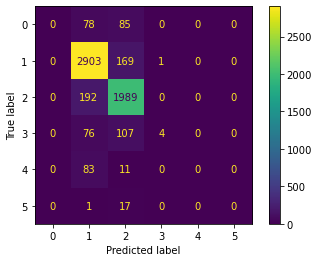

In [22]:
# generate a confusion matrix for Decision Tree model
label_list = pd.DataFrame(label)
preds = cross_val_predict(grid_search, data_x, label_list, cv=10)
cm = confusion_matrix(label_list.values.ravel(), preds)
#print(confusion_matrix(label_list.values.ravel(), preds))
print("Decision Tree")
print(classification_report(label_list.values.ravel(), preds))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Naive Bayes Evaluation

Naive Bayes had the worst performance out of any of the machine learning models. By looking at the confusion matrix below, it is apparent that this mainly due to mislabeling of Clinton voters for Stein voters.  

This makes sense due to Naive Bayes implementation where a probabilistic approach is used to classify data points. As such, third party's whose voter base hold incredibly similar political opinions are favored by the algorithm where as the larger party's who have more voters and thus more disagreement, have smaller probabilities per category. This reflects once again, a class imbalance issue. We initially chose to model using Naive Bayes because we felt it would deal well with the high number of features and dimensions in the data. However, as we can see, Naive Bayes had one of our worst accuracies of all the models. 

This outcome thus becomes a majority of Clinton voters being mistaken for Stein voters. Thus the precision may have been approved for the major parties but recall was greatly sacrificed.

Naive Bayes
              precision    recall  f1-score   support

           0       0.06      0.17      0.09       163
           1       0.93      0.01      0.02      3073
           2       0.94      0.46      0.62      2181
           3       0.13      0.19      0.16       187
           4       0.02      0.87      0.05        94
           5       0.01      0.33      0.02        18

    accuracy                           0.21      5716
   macro avg       0.35      0.34      0.16      5716
weighted avg       0.86      0.21      0.25      5716



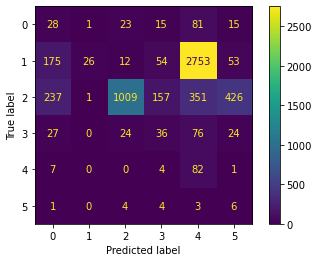

In [21]:
# generate a confusion matrix for Naive Bayes model
preds = cross_val_predict(clf, data_x, label_list, cv=10)
cm = confusion_matrix(label_list.values.ravel(), preds)
print("Naive Bayes")
#print(confusion_matrix(label_list.values.ravel(), preds))
print(classification_report(label_list.values.ravel(), preds))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## KNN Evaluation

KNN produced results very similar to the Decision Tree. Its overall accuracy is similar to Decision Tree and its calculations for precision, recall and f1-score for all of the classes are also similar. Likewise, it also fails to correctly identify third party voters. Going forward, we could've "weighed" votes to help mitigate this class imbalance and potentially identify third party voters. 

K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       163
           1       0.87      0.94      0.90      3073
           2       0.83      0.91      0.87      2181
           3       0.47      0.04      0.08       187
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00        18

    accuracy                           0.85      5716
   macro avg       0.36      0.31      0.31      5716
weighted avg       0.80      0.85      0.82      5716



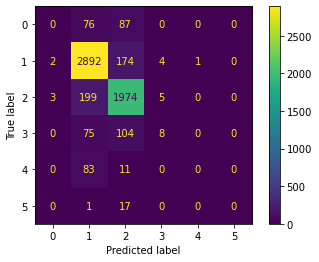

In [23]:
# generate a confusion matrix for KNN model
preds = cross_val_predict(knn, data_x, label_list, cv=10)
cm = confusion_matrix(label_list.values.ravel(), preds)
print("K-Nearest Neighbor")
#print(confusion_matrix(label_list.values.ravel(), preds))
print(classification_report(label_list.values.ravel(), preds))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Random Forest Evaluation
Like the classifiers that came before, the model has good accuracy when it comes to detecting voters for the two major political parties but struggles with third party voters. 

Random Forest
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       163
           1       0.88      0.95      0.91      3073
           2       0.85      0.92      0.88      2181
           3       0.73      0.06      0.11       187
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00        18

    accuracy                           0.86      5716
   macro avg       0.41      0.32      0.32      5716
weighted avg       0.82      0.86      0.83      5716



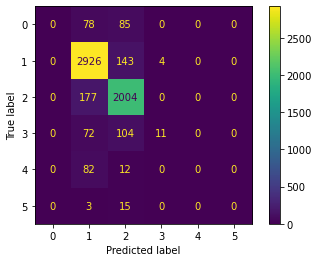

In [29]:
# generate a confusion matrix for Random Forest model
preds = cross_val_predict(forest, data_x, label_list, cv=5)
cm = confusion_matrix(label_list.values.ravel(), preds)
print("Random Forest")
#print(confusion_matrix(label_list.values.ravel(), preds))
print(classification_report(label_list.values.ravel(), preds))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## SVM Evaluation
The last of our models, the SVM model was not too different from the rest of the models we tried. It is pretty accurate in dtermining voters for the two major political candidates, but does not make good predictions for third party voters.

SVM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       163
           1       0.87      0.96      0.91      3073
           2       0.85      0.91      0.88      2181
           3       0.71      0.08      0.14       187
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00        18

    accuracy                           0.86      5716
   macro avg       0.41      0.32      0.32      5716
weighted avg       0.82      0.86      0.83      5716



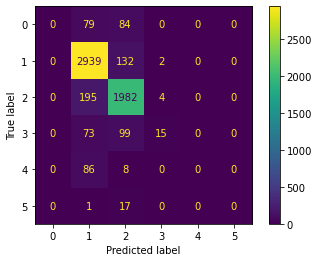

In [28]:
# generate a confusion matrix for SVM model
preds = cross_val_predict(svm, data_x, label_list, cv=5)
cm = confusion_matrix(label_list.values.ravel(), preds)
print("SVM")
#print(confusion_matrix(label_list.values.ravel(), preds))
print(classification_report(label_list.values.ravel(), preds))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Conclusion

In conclusion, we recommend our models for those who are trying to predict which one of the two major parties' political candidates a voter is going to vote for. However, for our original question: *Can we successfully predict the presidential candidate a voter voted for in the 2016 election based on their interest in public issues?* The answer is a bit fraught. Overall, we have a pretty good overall accuracy of predicting the candidate a voter will choose since a majority will vote for one of the two party's major political candidates. However, our models fail to catch third party voters. This blindspot in our data is logical given the class imbalance, but further data mining will be needed to catch these rare cases of third party votes.

## Strengths and Weaknesses 

We did a particular good job identifying important features and scaling the data based on these features. Even our models that are susceptibe to the curse of dimensionality did a good job with predictions for the two major parties, such as KNN, did well. The major political parties had relatvively high accuracies and F-scores with the expection of Naive Bayes when it came to identifying voters. 

We definitely struggled with the class imbalance between the third party voters and the Democrat and Republican voters. If we were to do this again, we could definitely look into using undersampling and oversampling to mitigate this class imbalance. However, when thinking about the usefulness of a dataset like this we discussed how identifying third party voters was not of the utmost importance. It is far more relevant to know about the major political parties, since this is likely to skew an election outcome more than anything. 

## Final Takeaways 

An interesting thing to note is that even outside third party voters there is still a significant number of voters for the two major parties that are mislabeled. In all the models (excluding Naive Bayes), around 175 - 200  Donald Trump voters are labeled as Hilary Clinton voters. Meanwhile, 150-175 Hilary Clinton voters are mislabeled as Trump voters. A variety of reasons can explain this discrepency. First, when asking the importance of a public issue, the reasoning for the importance is not given. So for issues such as Taxes where both party's are interested in the issue but for opposing reasons, saying Taxes are important to you may put you with the wrong label. Another reason may be voters drifting away to another party due to dissatisfaction with the presidential candidates. Given the controversial nature of both party's political candidates that year, some portion of voters may have voted across party lines in opposition to the party they usually vote for. 